In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [20]:
# import cost of living csv
coli_df = pd.read_csv("coli_composite.csv")
coli_df.head()

,Urban Area,State,COLI Composite
0,Anniston-CalhounCounty,AL,87.4
1,Auburn-Opelika,AL,92.3
2,Birmingham,AL,91.2
3,Decatur-Hartselle,AL,85.1
4,Dothan,AL,87.0


In [21]:
# import median rent per square feet by city (zillow)
mrsqft_df = pd.read_csv("median_rents_sqft.csv")
mrsqft_df.head()

,Region Name,State,2018-01
0,New York,NY,1.542
1,Los Angeles,CA,1.956
2,Chicago,IL,1.178
3,Dallas,TX,0.926
4,Philadelphia,PA,1.040


In [22]:
# import median property value per square feet by city (zillow)
mvsqft_df = pd.read_csv("median_value_sqft.csv")
mvsqft_df.head()

,Region Name,State,2018-01
0,New York,NY,255
1,Los Angeles,CA,423
2,Chicago,IL,142
3,Dallas,TX,118
4,Philadelphia,PA,140


In [23]:
# import office build out costs per city (JLL)
office_boc_sqft = pd.read_csv("office_boc_sqft.csv")
office_boc_sqft.head()

,City/Region,State,BOC_Sqft
0,Atlanta,GA,128.83
1,Austin,TX,141.22
2,Boston,MA,156.92
3,Chicago,IL,174.70
4,Columbus,OH,150.06


In [24]:
# import hq2 city list
city_list = pd.read_csv("amazon_hq2_finalists.csv")
city_list.head()

,City/Region,State
0,Atlanta,GA
1,Austin,TX
2,Boston,MA
3,Chicago,IL
4,Columbus,OH


In [25]:
# merging residential real estate costs, office real estate costs, and cost of living data part 1
new_df = pd.merge(city_list, mvsqft_df,  how='left', left_on=['City/Region','State'], right_on = ['Region Name','State'])
del new_df['Region Name']
new_df.columns = ['Region', 'State', 'Median Value / Sqft']
new_df = pd.merge(new_df, mrsqft_df,  how='left', left_on=['Region','State'], right_on = ['Region Name','State'])
del new_df['Region Name']
new_df.columns = ['Region', 'State', 'Median Value / Sqft', 'Median Rent / Sqft']

In [26]:
# merging residential real estate costs, office real estate costs, and cost of living data part 2
merged_df = pd.merge(new_df, coli_df,  how='left', left_on=['Region','State'], right_on = ['Urban Area','State'])
merged_df = pd.merge(merged_df, office_boc_sqft, how='left', left_on=['Region','State'], right_on = ['City/Region','State'])
del merged_df['Urban Area']
del merged_df['City/Region']
merged_df

,Region,State,Median Value / Sqft,Median Rent / Sqft,COLI Composite,BOC_Sqft
0,Atlanta,GA,103,0.782,98.8,128.83
1,Austin,TX,151,0.988,97.3,141.22
2,Boston,MA,271,1.514,147.9,156.92
3,Chicago,IL,142,1.178,123.4,174.70
4,Columbus,OH,114,0.892,89.6,150.06
5,Dallas,TX,118,0.926,101.9,138.00
6,Denver,CO,248,1.382,111.8,143.10
7,Indianapolis,IN,88,0.760,92.4,167.89
8,Los Angeles,CA,423,1.956,147.8,130.68
9,Miami,FL,176,1.382,114.4,140.40


In [28]:
# set variables and rank median house value data
mv_max = max(merged_df['Median Value / Sqft'])
mv_min = min(merged_df['Median Value / Sqft'])
mv_range = mv_max - mv_min
merged_df['mv_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['Median Value / Sqft'] - mv_max))/mv_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'mv_score', score)

# set variables and rank median rent data
mr_max = max(merged_df['Median Rent / Sqft'])
mr_min = min(merged_df['Median Rent / Sqft'])
mr_range = mr_max - mr_min
merged_df['mr_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['Median Rent / Sqft'] - mr_max))/mr_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'mr_score', score)

# set variables and rank coli data
coli_max = max(merged_df['COLI Composite'])
coli_min = min(merged_df['COLI Composite'])
coli_range = coli_max - coli_min
merged_df['coli_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['COLI Composite'] - coli_max))/coli_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'coli_score', score)

# set variables and rank boc data
boc_max = max(merged_df['BOC_Sqft'])
boc_min = min(merged_df['BOC_Sqft'])
boc_range = boc_max - boc_min
merged_df['boc_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['BOC_Sqft'] - boc_max))/boc_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'boc_score', score)

merged_df['Total Score'] = (merged_df['mv_score']+merged_df['mr_score']+merged_df['coli_score']+merged_df['boc_score'])

# set variables and rank total score
tot_max = max(merged_df['Total Score'])
tot_min = min(merged_df['Total Score'])
tot_range = tot_max - tot_min
merged_df['RE & COL Score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['Total Score'] - tot_min))/tot_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'RE & COL Score', score)

merged_df.sort_values('RE & COL Score', ascending=False)

,Region,State,Median Value / Sqft,Median Rent / Sqft,COLI Composite,BOC_Sqft,mv_score,mr_score,coli_score,boc_score,Total Score,RE & COL Score
0,Atlanta,GA,103,0.782,98.8,128.83,9.6,9.8,9.1,6.7,35.2,10.0
17,Raleigh,NC,129,0.808,96.2,134.07,8.8,9.6,9.3,6.0,33.7,9.4
4,Columbus,OH,114,0.892,89.6,150.06,9.2,8.9,10.0,3.9,32.0,8.8
5,Dallas,TX,118,0.926,101.9,138.00,9.1,8.6,8.8,5.5,32.0,8.8
7,Indianapolis,IN,88,0.760,92.4,167.89,10.0,10.0,9.7,1.5,31.2,8.5
11,Nashville,TN,137,0.920,96.6,148.06,8.5,8.7,9.3,4.1,30.6,8.3
1,Austin,TX,151,0.988,97.3,141.22,8.1,8.1,9.2,5.0,30.4,8.2
16,Pittsburgh,PA,103,0.832,99.4,160.17,9.6,9.4,9.0,2.5,30.5,8.2
15,Philadelphia,PA,140,1.040,117.0,156.85,8.4,7.7,7.2,3.0,26.3,6.7
9,Miami,FL,176,1.382,114.4,140.40,7.4,4.8,7.5,5.1,24.8,6.1


In [29]:
# import education statistics from National Center for Education Statistics
edu_stats_df = pd.read_csv("education_statistics.csv")
edu_stats_df = edu_stats_df[['State Abb', 'Total']]
edu_stats_df = pd.merge(city_list, edu_stats_df, how='left', left_on=['State'], right_on = ['State Abb'])
del edu_stats_df['State Abb']

# set variables for ranking data
edu_max = max(edu_stats_df['Total'])
edu_min = min(edu_stats_df['Total'])
edu_range = edu_max - edu_min
edu_stats_df['Workforce Talent Score'] = 2.0

# loop through and create degree score
for index, row in edu_stats_df.iterrows():
    score = (row['Total'] - edu_min)/edu_range*10
    score = round(score, 1)
    edu_stats_df.set_value(index, 'Workforce Talent Score', score)
    
edu_stats_df.sort_values('Workforce Talent Score', ascending=False)

,City/Region,State,Total,Workforce Talent Score
8,Los Angeles,CA,226411.0,10.0
13,New York,NY,169040.0,7.3
5,Dallas,TX,153102.0,6.5
1,Austin,TX,153102.0,6.5
9,Miami,FL,124331.0,5.2
16,Pittsburgh,PA,117020.0,4.8
15,Philadelphia,PA,117020.0,4.8
3,Chicago,IL,107583.0,4.4
2,Boston,MA,84944.0,3.3
4,Columbus,OH,78498.0,3.0


In [30]:
# import camelot climate index from csv 
cci_df = pd.read_csv("camelot_climate_index.csv")
cci_df.head()

# attempt merge
cci_df_merged = pd.merge(city_list, cci_df, how='left', left_on=['City/Region'], right_on = ['City'])
cci_df_merged = cci_df_merged[['City/Region', 'State_x', 'INDEX']]
cci_df_merged.columns = [['City', 'State', 'Camelot Index']]
cci_df_merged

,City,State,Camelot Index
0,Atlanta,GA,70
1,Austin,TX,66
2,Boston,MA,68
3,Chicago,IL,63
4,Columbus,OH,63
5,Dallas,TX,66
6,Denver,CO,67
7,Indianapolis,IN,64
8,Los Angeles,CA,86
9,Miami,FL,70


In [31]:
# import modules for api request using google places api
import requests
import json
from config_jake import api_key

In [36]:
# run google place api to retrieve distances from Seattle - current HQ2 location
url = "https://maps.googleapis.com/maps/api/distancematrix/json?"
cci_df_merged['Dist From Seattle'] = ''

# for index, row in cci_df_merged.iterrows():
#     params={"units": "metric", "key": api_key, "origins": "Seattle,Washington", "destinations": f"{row[0]},{row[1]}"}
#     response = requests.get(url, params=params).json()
#     print(f'Loading {row[0]}')
#     cci_df_merged.set_value(index, 'Dist From Seattle', response['rows'][0]['elements'][0]['distance']['value'])

# set variables and rank camelot data
# cam_max = max(cci_df_merged['Camelot Index'])
# cam_min = min(cci_df_merged['Camelot Index'])
# cam_range = cam_max - cam_min
# cci_df_merged['cam_score'] = 2.0

# for index, row in cci_df_merged.iterrows():
#     score = (abs(row['Camelot Index'] - cam_min))/cam_range*10
#     score = round(score, 1)
#     cci_df_merged.set_value(index, 'cam_score', score)


# # set variables and rank boc data
# dist_max = max(cci_df_merged['Dist From Seattle'])
# dist_min = min(cci_df_merged['Dist From Seattle'])
# dist_range = dist_max - dist_min
# cci_df_merged['dist_score'] = 2.0

# for index, row in cci_df_merged.iterrows():
#     score = (abs(row['Dist From Seattle'] - dist_min))/dist_range*10
#     score = round(score, 1)
#     cci_df_merged.set_value(index, 'dist_score', score)

cci_df_merged['Total Score'] = (cci_df_merged['cam_score']*0.25)+(cci_df_merged['dist_score']*0.75)

# Set variables and rank total score
tot_max = max(cci_df_merged['Total Score'])
tot_min = min(cci_df_merged['Total Score'])
tot_range = tot_max - tot_min
cci_df_merged['Geo Score'] = 1.0

for index, row in cci_df_merged.iterrows():
    score = (abs(row['Total Score'] - tot_min))/tot_range*10
    score = round(score, 1)
    cci_df_merged.set_value(index, 'Geo Score', score)

cci_df_merged.sort_values('Geo Score', ascending=False)

,City,State,Camelot Index,Dist From Seattle,cam_score,dist_score,Total Score,Geo Score
9,Miami,FL,70,,3.3,10.0,8.325,10.0
2,Boston,MA,68,,2.5,8.8,7.225,8.5
12,Newark,NJ,68,,2.5,7.9,6.550,7.5
17,Raleigh,NC,67,,2.1,8.0,6.525,7.5
13,New York,NY,68,,2.5,7.9,6.550,7.5
15,Philadelphia,PA,67,,2.1,7.8,6.375,7.3
14,Northern Virginia,VA,68,,2.5,7.5,6.250,7.1
18,Washington,DC,68,,2.5,7.5,6.250,7.1
10,Montgomery County,MD,68,,2.5,7.4,6.175,7.0
0,Atlanta,GA,70,,3.3,6.9,6.000,6.8


In [37]:
merge1 = pd.merge(city_list, merged_df[['Region', 'RE & COL Score']], how='left', left_on=['City/Region'], right_on=['Region'])
merge2 = pd.merge(merge1, edu_stats_df[['City/Region', 'Workforce Talent Score']], how='left', left_on=['City/Region'], right_on=['City/Region'])
merge3 = pd.merge(merge2, cci_df_merged[['City', 'Geo Score']], how='left', left_on=['City/Region'], right_on=['City'])
del merge3['Region']
del merge3['City']
del merge3['Workforce Talent Score']
merge3.to_csv("Final Rankings RE, COL, & GEO.csv", index=False)

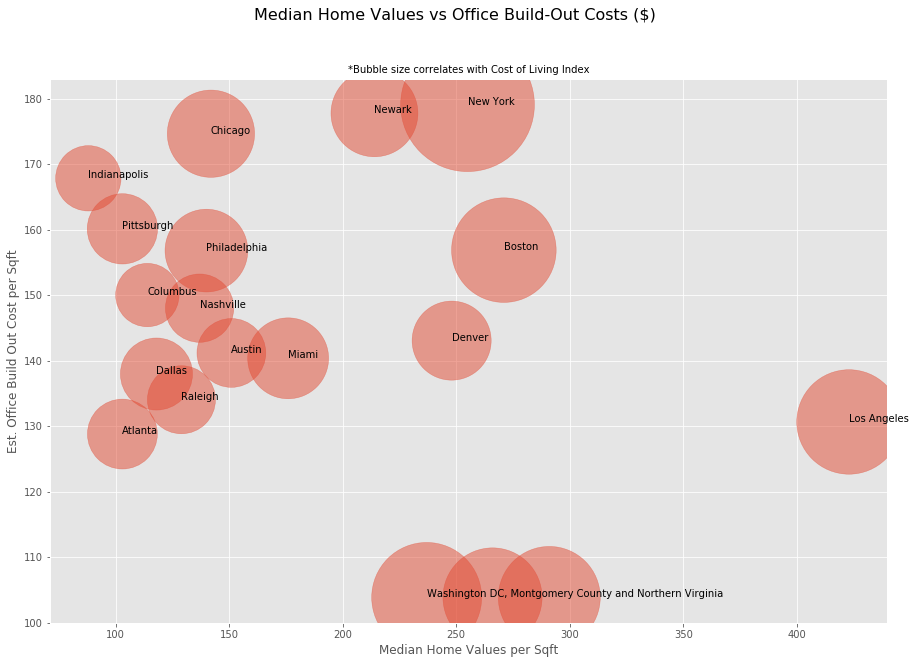

In [18]:
# plotting home values vs
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(merged_df['Median Value / Sqft'], merged_df['BOC_Sqft'], s=merged_df['COLI Composite']*merged_df['COLI Composite']/2, alpha=0.5)
for i, txt in enumerate(merged_df['Region']):
    if i == 10:
        ax.annotate('', (merged_df['Median Value / Sqft'][i], merged_df['BOC_Sqft'][i]))
    elif i == 14:
        ax.annotate('', (merged_df['Median Value / Sqft'][i], merged_df['BOC_Sqft'][i]))
    elif i == 18:
        ax.annotate('Washington DC, Montgomery County and Northern Virginia', (merged_df['Median Value / Sqft'][i], merged_df['BOC_Sqft'][i]))
    else:
        ax.annotate(txt, (merged_df['Median Value / Sqft'][i], merged_df['BOC_Sqft'][i]))    
plt.suptitle('Median Home Values vs Office Build-Out Costs ($)', fontsize=16)
plt.title('*Bubble size correlates with Cost of Living Index', fontsize=10)
plt.xlabel('Median Home Values per Sqft')
plt.ylabel('Est. Office Build Out Cost per Sqft')
plt.savefig('Median Home Values vs Office Build-Out Costs ($).png')
plt.show()